In [66]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
pd.set_option('display.max_columns', 500)

In [4]:
# Let's start by making a plot for average rent prices vs. time across the state of California
# first we need to import the zillow rent data
df = pd.read_csv('Zip_Zri_AllHomesPlusMultifamily.csv', dtype={'RegionName': str})

In [7]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,...,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,...,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,...,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,...,1765.0,1755.0,1751.0,1752.0,1754.0,1759.0,1764.0,1769.0,1776.0,1778.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1922.0,1925.0,1921.0,...,2245.0,2289.0,2332.0,2372.0,2398.0,2412.0,2348.0,2356.0,2311.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13176,68966,26291,Snowshoe,WV,NaN,Pocahontas County,13177,946.0,NaN,NaN,...,965.0,959.0,956.0,958.0,956.0,951.0,932.0,928.0,930.0,923.0
13177,62697,12720,Bethel,NY,NaN,Sullivan County,13178,1372.0,1390.0,1417.0,...,1279.0,1284.0,1288.0,1295.0,1294.0,1305.0,NaN,1348.0,1310.0,1272.0
13178,68924,26209,Snowshoe,WV,NaN,Pocahontas County,13179,NaN,NaN,NaN,...,728.0,727.0,725.0,724.0,745.0,762.0,779.0,NaN,NaN,765.0
13179,75924,41101,Ashland,KY,Huntington-Ashland,Boyd County,13180,758.0,754.0,760.0,...,852.0,850.0,847.0,842.0,836.0,836.0,829.0,853.0,828.0,815.0


In [14]:
df['State'].isna().sum()#.sort_values(ascending=False).head(60)

0

In [17]:
ca = df[df.State == 'CA']
ca

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
13,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,3135.0,3114.0,3118.0,3136.0,3136.0,3112.0,3089.0,3069.0,3042.0,3049.0,3074.0,3138.0,3191.0,3214.0,3243.0,3268.0,3275.0,3284.0,3321.0,3342.0,3359.0,3396.0,3443.0,3453.0,3430.0,3399.0,3381.0,3423.0,3494.0,3548.0,3585.0,3626.0,3663.0,3717.0,3763.0,3808.0,3848.0,3904.0,3973.0,4036.0,4047.0,4053.0,4055.0,4058.0,4062.0,4068.0,4107.0,4146.0,4173.0,4198.0,4234.0,4278.0,4319.0,4351.0,4386.0,4434.0,4465.0,4497.0,4549.0,4609.0,4649.0,4672.0,4669.0,4643.0,4617.0,4599.0,4566.0,4545.0,4519.0,4491.0,4481.0,4471.0,4460.0,4430.0,4391.0,4345.0,4306.0,4283.0,4260.0,4238.0,4233.0,4223.0,4220.0,4217.0,4217.0,4204.0,4192.0,4184.0,4188.0,4185.0,4197.0,4202.0,4201.0,4227.0,4242.0,4261.0,4284.0,4315.0,4323.0,4326.0,4365.0,4376.0,4381.0,4399.0,4425.0,4437.0,4449.0,4458.0,4455.0,4461.0,4416.0,4431.0,4406.0
20,96107,90250,Hawthorne,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,21,2350.0,2381.0,2366.0,2357.0,2358.0,2350.0,2335.0,2326.0,2319.0,2310.0,2314.0,2305.0,2308.0,2307.0,2295.0,2285.0,2271.0,2268.0,2251.0,2261.0,2278.0,2286.0,2282.0,2280.0,2270.0,2286.0,2302.0,2280.0,2280.0,2291.0,2299.0,2284.0,2298.0,2297.0,2302.0,2303.0,2330.0,2345.0,2340.0,2344.0,2353.0,2358.0,2334.0,2330.0,2334.0,2352.0,2376.0,2405.0,2420.0,2450.0,2474.0,2501.0,2517.0,2526.0,2527.0,2532.0,2535.0,2557.0,2584.0,2608.0,2579.0,2564.0,2542.0,2536.0,2541.0,2553.0,2555.0,2580.0,2595.0,2602.0,2610.0,2647.0,2677.0,2701.0,2702.0,2685.0,2688.0,2655.0,2634.0,2632.0,2661.0,2675.0,2685.0,2691.0,2691.0,2663.0,2654.0,2655.0,2648.0,2663.0,2677.0,2710.0,2726.0,2722.0,2712.0,2671.0,2650.0,2643.0,2629.0,2584.0,2585.0,2590.0,2596.0,2602.0,2603.0,2607.0,2606.0,2609.0,2617.0,2623.0,2642.0,2600.0,2585.0
37,97771,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,38,1813.0,1785.0,1777.0,1775.0,1753.0,1724.0,1704.0,1689.0,1678.0,1672.0,1669.0,1664.0,1650.0,1651.0,1648.0,1646.0,1646.0,1650.0,1652.0,1662.0,1673.0,1683.0,1686.0,1691.0,1692.0,1694.0,1695.0,1695.0,1700.0,1706.0,1710.0,1715.0,1718.0,1716.0,1718.0,1716.0,1718.0,1720.0,1726.0,1735.0,1755.0,1764.0,1765.0,1760.0,1761.0,1760.0,1765.0,1772.0,1783.0,1798.0,1820.0,1839.0,1866.0,1885.0,1892.0,1895.0,1907.0,1911.0,1920.0,1930.0,1950.0,1965.0,1980.0,1995.0,2014.0,2036.0,2049.0,2061.0,2070.0,2087.0,2102.0,2110.0,2104.0,2098.0,2092.0,2092.0,2091.0,2090.0,2091.0,2091.0,2098.0,2107.0,2123.0,2136.0,2153.0,2164.0,2164.0,2161.0,2155.0,2151.0,2148.0,2148.0,2162.0,2176.0,2186.0,2190.0,2188.0,2194.0,2204.0,2222.0,2222.0,2233.0,2242.0,2246.0,2254.0,2266.0,2276.0,2285.0,2291.0,2302.0,2318.0,2313.0,2283.0
41,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,42,2653.0,2682.0,2689.0,2691.0,2699.0,2706.0,2705.0,2704.0,2700.0,2704.0,2709.0,2709.0,2724.0,2739.0,2739.0,2733.0,2723.0,2725.0,2725.0,2741.0,2738.0,2743.0,2752.0,2768.0,2779.0,2769.0,2778.0,2776.0,2771.0,2759.0,2760.0,2768.0,2782.0,2788.0,2803.0,2813.0,2829.0,2836.0,2848.0,2841.0,2829.0,2824.0,2795.0,2801.0,2846.0,2856.0,2893.0,2926.

In [18]:
ca.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '2010-09', '2010-10', '2010-11',
       ...
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01'],
      dtype='object', length=120)

In [35]:
rent_vs_time = ca.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'
                ]).mean().reset_index().reset_index().rename(
                columns={'level_0': 'month', 'index':'date', 0:'avg_rent'})
rent_vs_time

,month,date,avg_rent
0,0,2010-09,1966.375785
1,1,2010-10,2005.847543
2,2,2010-11,1975.876394
3,3,2010-12,1978.098963
4,4,2011-01,1975.871129
...,...,...,...
108,108,2019-09,2463.573287
109,109,2019-10,2467.135014
110,110,2019-11,2459.555953
111,111,2019-12,2457.592368


In [38]:
for i in range(1, 113):
    rent_vs_time.loc[i, 'diff'] = rent_vs_time.loc[i, 'avg_rent'] - rent_vs_time.loc[i-1, 'avg_rent']

In [41]:
for i in range(2, 113):
    rent_vs_time.loc[i, 'diff_diff'] = rent_vs_time.loc[i, 'diff'] - rent_vs_time.loc[i-1, 'diff']

In [44]:
for i in range(3, 113):
    rent_vs_time.loc[i, 'diff_x3'] = rent_vs_time.loc[i, 'diff_diff'] - rent_vs_time.loc[i-1, 'diff_diff']

In [84]:
for i in range(2, 113):
    rent_vs_time.loc[i, 'diff_3mo_avg'] = \
    (rent_vs_time.loc[i-1, 'diff'] + rent_vs_time.loc[i, 'diff'] + rent_vs_time.loc[i, 'diff'])/3

In [85]:
rent_vs_time

,month,date,avg_rent,diff,diff_diff,diff_x3,diff_3mo_avg
0,0,2010-09,1966.375785,NaN,NaN,NaN,NaN
1,1,2010-10,2005.847543,39.471758,NaN,NaN,NaN
2,2,2010-11,1975.876394,-29.971149,-69.442906,NaN,-6.823513
3,3,2010-12,1978.098963,2.222569,32.193718,101.636624,-8.508670
4,4,2011-01,1975.871129,-2.227834,-4.450404,-36.644121,-0.744367
...,...,...,...,...,...,...,...
108,108,2019-09,2463.573287,8.079363,0.917903,2.184808,7.773396
109,109,2019-10,2467.135014,3.561726,-4.517637,-5.435540,5.067605
110,110,2019-11,2459.555953,-7.579060,-11.140786,-6.623149,-3.865465
111,111,2019-12,2457.592368,-1.963586,5.615474,16.756261,-3.835410


<AxesSubplot:xlabel='month', ylabel='avg_rent'>

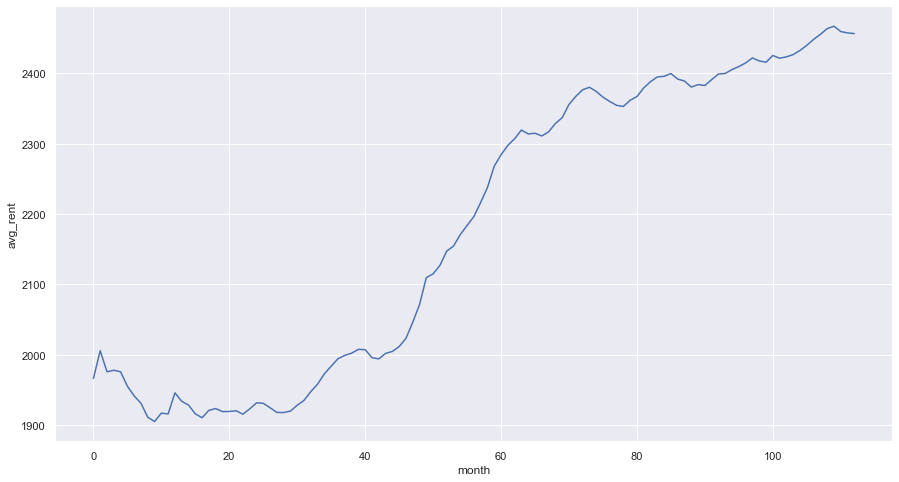

In [30]:
sns.lineplot(data=rent_vs_time, x="month", y="avg_rent")

<AxesSubplot:xlabel='month', ylabel='diff'>

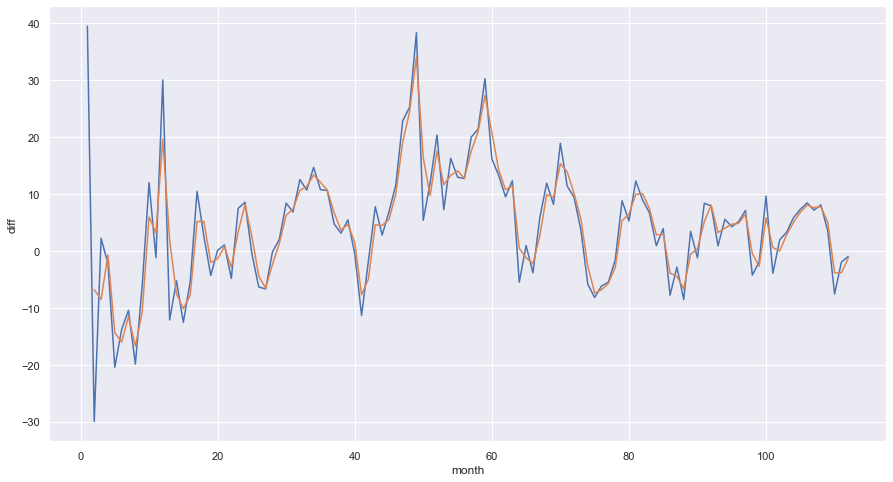

In [88]:
sns.lineplot(data=rent_vs_time, x="month", y="diff")
sns.lineplot(data=rent_vs_time, x="month", y="diff_3mo_avg")

<AxesSubplot:xlabel='month', ylabel='diff_diff'>

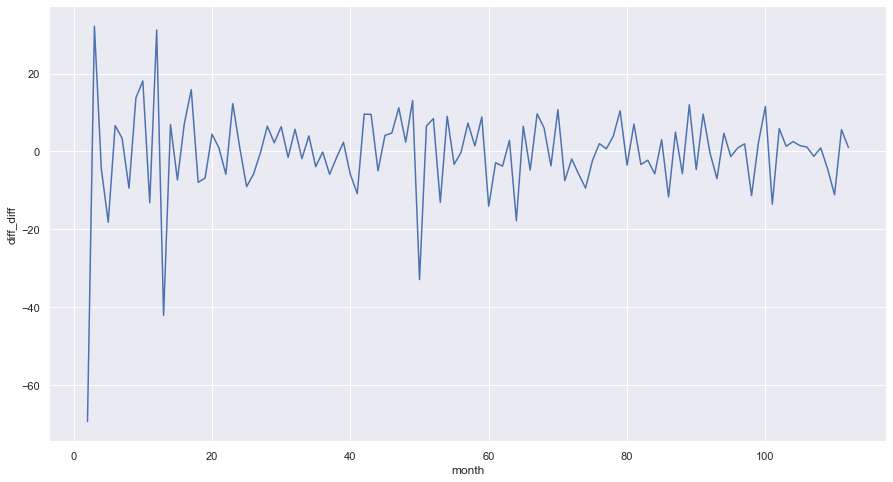

In [43]:
sns.lineplot(data=rent_vs_time, x="month", y="diff_diff")

<AxesSubplot:xlabel='month', ylabel='diff_x3'>

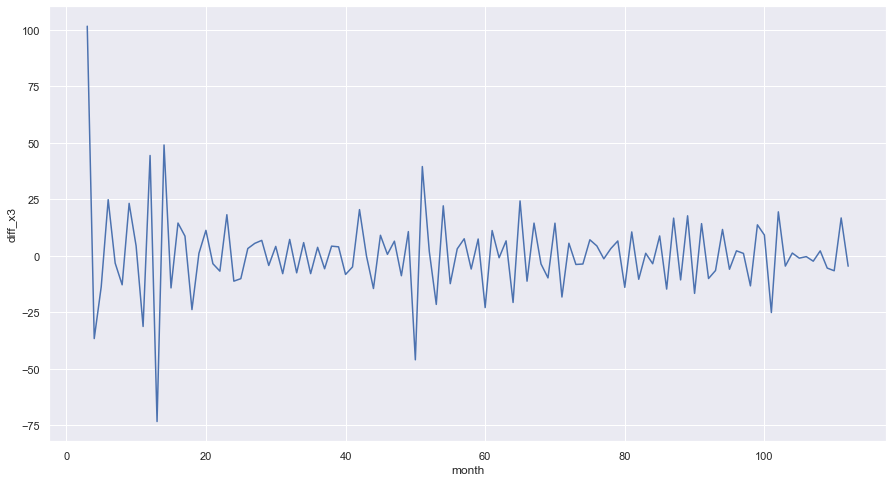

In [46]:
sns.lineplot(data=rent_vs_time, x="month", y="diff_x3")

In [48]:
type(rent_vs_time.avg_rent)

pandas.core.series.Series

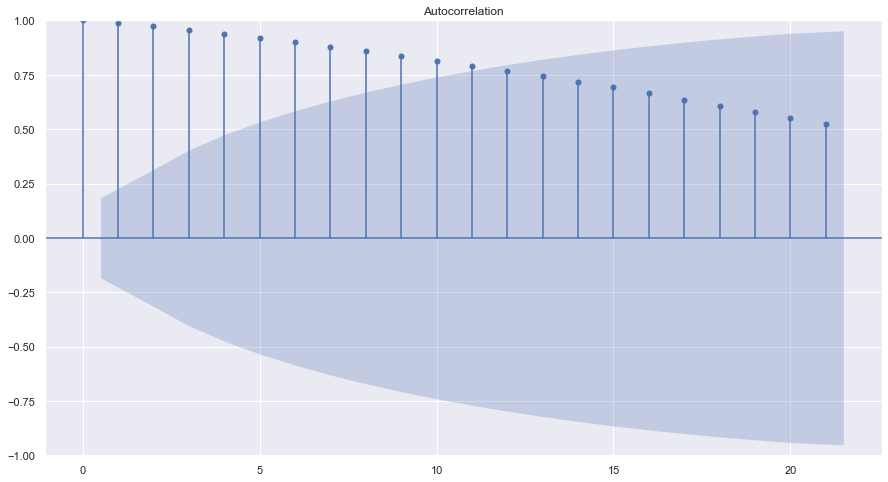

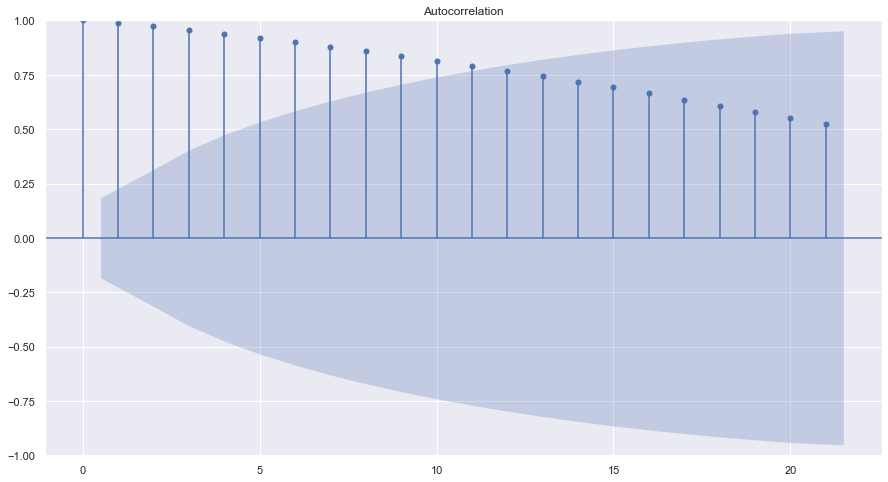

In [63]:
plot_acf(rent_vs_time.avg_rent)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


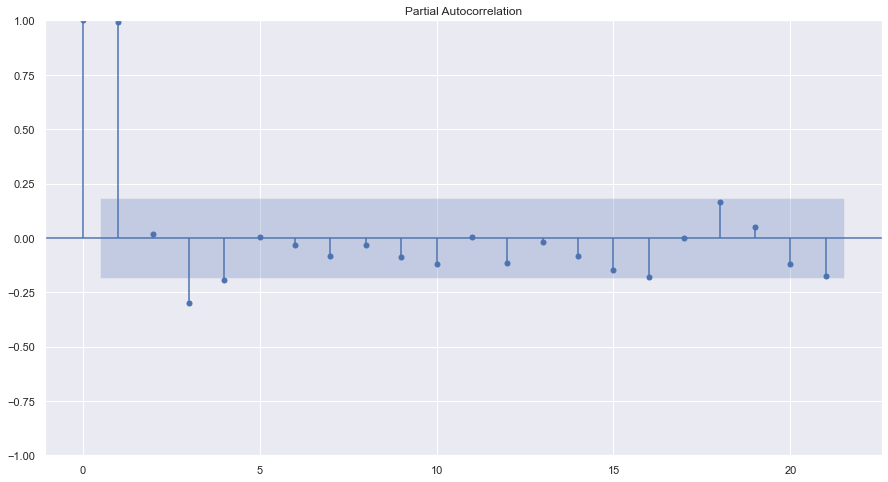

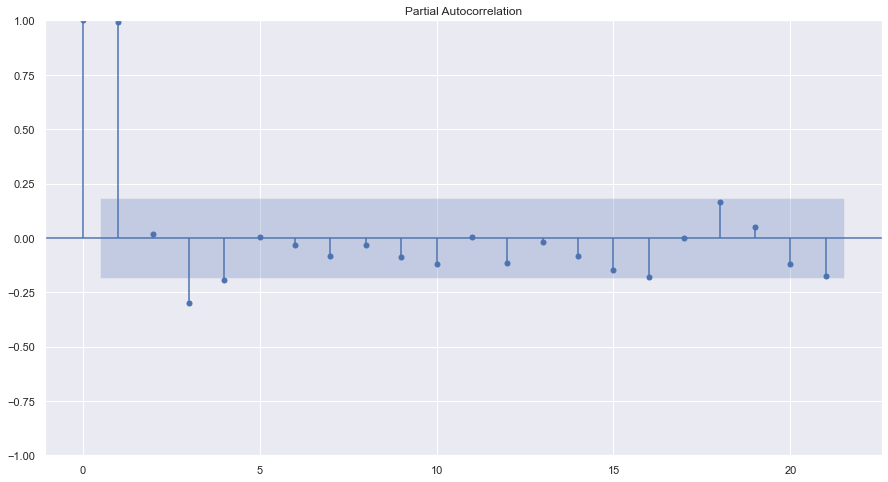

In [61]:
plot_pacf(rent_vs_time.avg_rent)

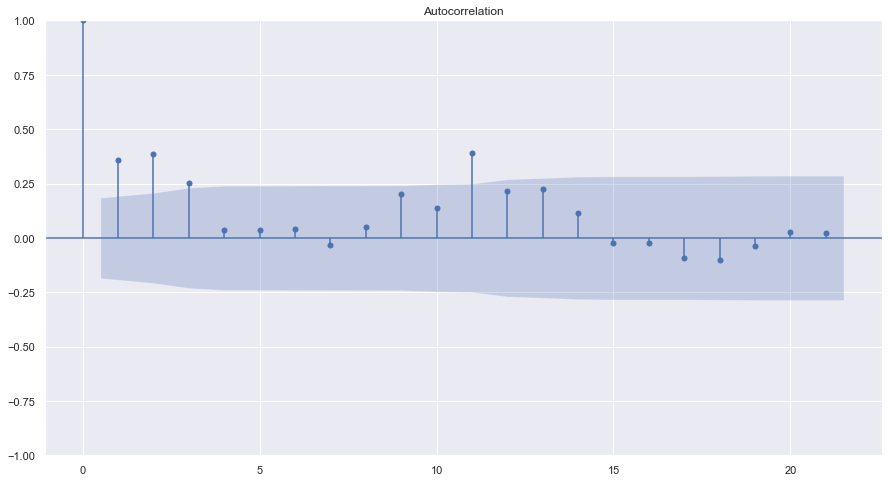

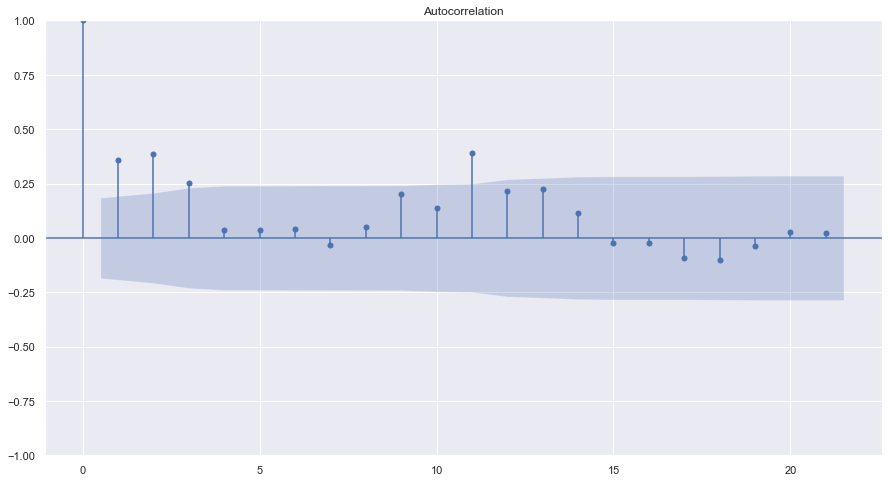

In [64]:
#autocorrelation_plot(rent_vs_time['diff'])
plot_acf(rent_vs_time['diff'][1:])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


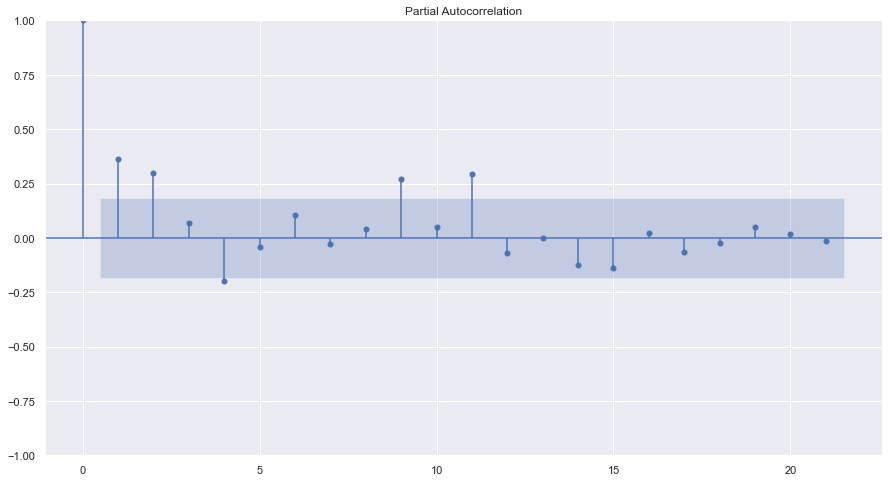

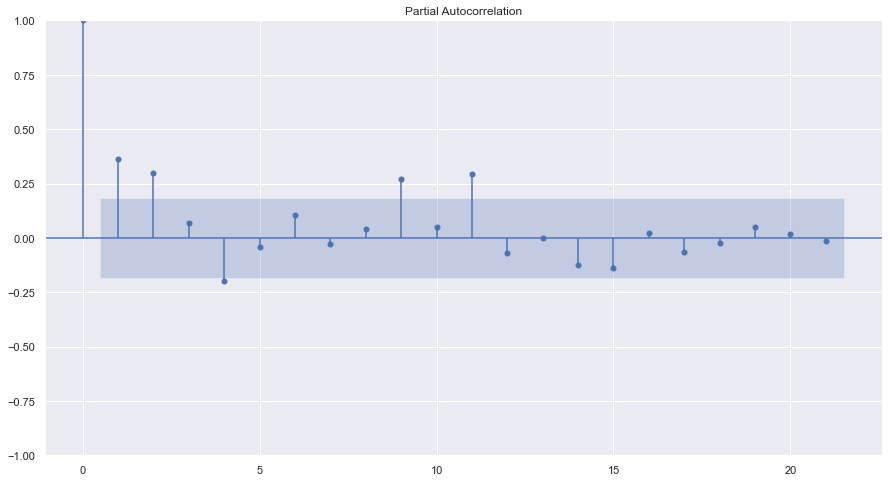

In [65]:
plot_pacf(rent_vs_time['diff'][1:])

In [ ]:
# so I would say it looks like we want d=1 q=2or3, p=2, s=12 for seasonality

In [67]:
model = SARIMAX(rent_vs_time.avg_rent, order=(2,1,2), seasonal_order=(2,1,2,12))

In [71]:
result = model.fit(disp=False)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           avg_rent   No. Observations:                  113
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -368.052
Date:                            Fri, 10 Dec 2021   AIC                            754.104
Time:                                    12:54:32   BIC                            777.551
Sample:                                         0   HQIC                           763.593
                                            - 113                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3947      0.247      1.599      0.110      -0.089       0.878
ar.L2          0.2537      0.233      1.089      0.276      -0.203       0.710
ma.L1         -0.2741      0.266     -1.032      0.302      -0.795       0.246
ma.L2          0.1955      0.185      1.058      0.290      -0.167       0.558
ar.S.L12      -0.9760      0.636     -1.535      0.125      -2.222       0.270
ar.S.L24       0.0226      0.187      0.121      0.904      -0.343       0.388
ma.S.L12      -0.0137    236.501  -5.78e-05      1.000    -463.547     463.519
ma.S.L24      -0.9862    233.598     -0.004      0.997    -458.830     456.857
sigma2        67.1125   1.59e+04      0.004      0.997   -3.11e+04    3.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                10.90
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.55e+14. Standard errors may be unstable.
"""

In [73]:
rent_vs_time.to_csv('rent_vs_time.csv', index=False)

# Los Angeles 🎥 San Francisco 🌁

In [77]:
la = ca[ca.Metro == 'Los Angeles-Long Beach-Anaheim']
sf = ca[ca.Metro == 'San Francisco-Oakland-Hayward']

In [79]:
la_rent = la.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'
                ]).mean().reset_index().reset_index().rename(
                columns={'level_0': 'month', 'index':'date', 0:'avg_rent'})
sf_rent = sf.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'
                ]).mean().reset_index().reset_index().rename(
                columns={'level_0': 'month', 'index':'date', 0:'avg_rent'})

In [82]:
sf_rent.to_csv('sf_rent.csv', index=False)
la_rent.to_csv('la_rent.csv', index=False)

In [83]:
sf_rent

,month,date,avg_rent
0,0,2010-09,2418.194030
1,1,2010-10,2419.657407
2,2,2010-11,2419.975207
3,3,2010-12,2414.203390
4,4,2011-01,2472.317308
...,...,...,...
108,108,2019-09,3448.395683
109,109,2019-10,3415.276119
110,110,2019-11,3394.764706
111,111,2019-12,3396.964029
